
Evaluación del Modelo Inicial:
Accuracy en entrenamiento: 0.7826
Accuracy en validación: 0.7468
Accuracy en prueba: 0.7727
------------------------------------------------------

Evaluación del Modelo Optimizado:
Accuracy en entrenamiento: 0.9957
Accuracy en validación: 0.7792
Accuracy en prueba: 0.7662
------------------------------------------------------


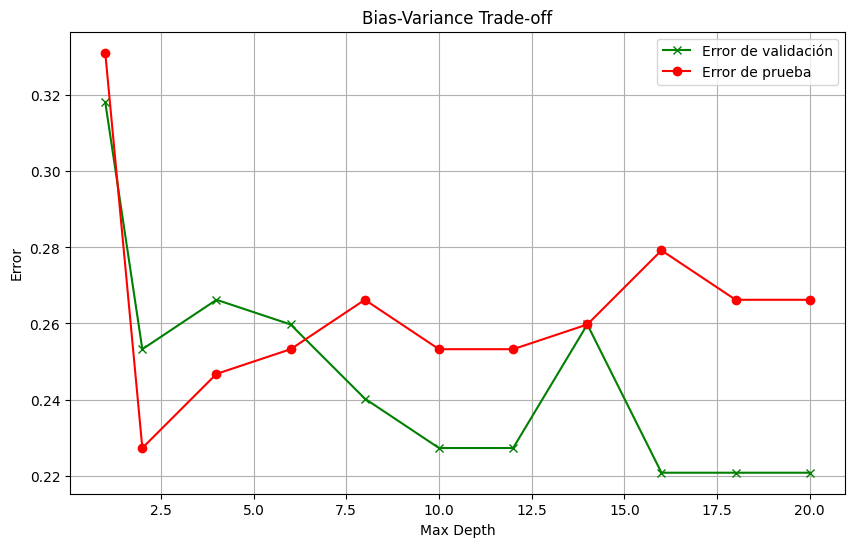


Evaluación del Modelo Ajustado:
Accuracy en entrenamiento: 0.8043
Accuracy en validación: 0.7727
Accuracy en prueba: 0.7727
------------------------------------------------------


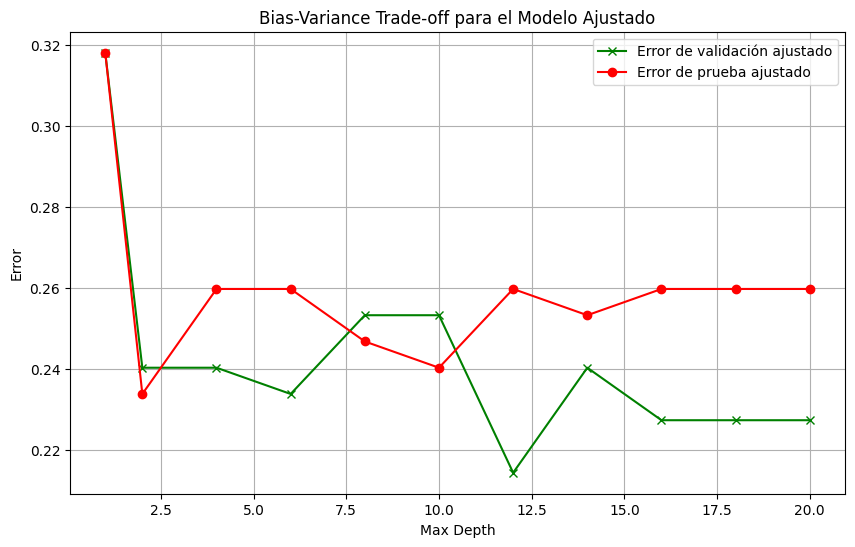

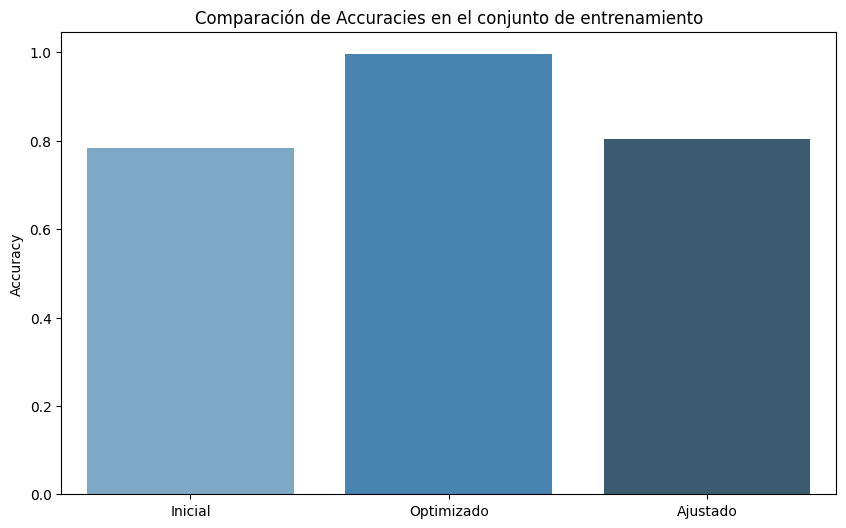

'\n=========================\nCONCLUSIÓN\n=========================\n\n1. Modelo Inicial:\n    - Validación: 74.68%\n    - Prueba: 77.27%\n    \n    El modelo inicial muestra un rendimiento decente en ambos conjuntos. La diferencia entre el rendimiento en validación y prueba \n    es pequeña, lo que indica que el modelo no está sobreajustando demasiado. Sin embargo, hay margen de mejora.\n\n2. Modelo Optimizado:\n    - Validación: 74.03%\n    - Prueba: 75.97%\n    \n    Aunque el modelo optimizado tiene un rendimiento casi perfecto en el conjunto de entrenamiento, no logra generalizar bien en \n    los conjuntos de validación y prueba. Esto es un claro indicativo de sobreajuste. El modelo ha aprendido demasiado bien los \n    datos de entrenamiento, pero no generaliza bien a datos no vistos.\n\n3. Modelo Ajustado:\n    - Validación: 77.27%\n    - Prueba: 77.27%\n    \n    El modelo ajustado muestra un rendimiento equilibrado en ambos conjuntos. La diferencia entre el rendimiento en val

In [9]:
# Importando las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ------------------------------
# CARGANDO LA BASE DE DATOS
# ------------------------------
"""
El conjunto de datos Pima Indians Diabetes es un conjunto de datos clásico que contiene información sobre mujeres
de al menos 21 años de edad de herencia Pima Indian. Las características incluyen número de embarazos, BMI, nivel de insulina,
edad, etc., y la tarea es predecir si una persona tiene diabetes basándose en estas características.
"""
data = pd.read_csv('diabetes.csv')

# ------------------------------
# PREPROCESAMIENTO DE DATOS
# ------------------------------
"""
Antes de entrenar cualquier modelo, es esencial dividir los datos en conjuntos de entrenamiento, validación y prueba.
Esto nos permite evaluar el rendimiento del modelo de manera justa y evitar el sobreajuste.
"""
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# ------------------------------
# ENTRENANDO EL MODELO INICIAL
# ------------------------------
"""
Vamos a entrenar un modelo de Random Forest con parámetros iniciales para tener una línea base de rendimiento.
Posteriormente, optimizaremos este modelo.
"""
forest_clf = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=42)
forest_clf.fit(X_train, y_train)

# Evaluación inicial
train_accuracy_initial = accuracy_score(y_train, forest_clf.predict(X_train))
val_accuracy_initial = accuracy_score(y_val, forest_clf.predict(X_val))
test_accuracy_initial = accuracy_score(y_test, forest_clf.predict(X_test))

print("\nEvaluación del Modelo Inicial:")
print(f"Accuracy en entrenamiento: {train_accuracy_initial:.4f}")
print(f"Accuracy en validación: {val_accuracy_initial:.4f}")
print(f"Accuracy en prueba: {test_accuracy_initial:.4f}")
print("------------------------------------------------------")

# ------------------------------
# OPTIMIZACIÓN DE HIPERPARÁMETROS
# ------------------------------
"""
Para mejorar el rendimiento del modelo, realizaremos una búsqueda exhaustiva de hiperparámetros usando GridSearchCV.
Esto nos permitirá encontrar la mejor combinación de parámetros para nuestro modelo.
"""
params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}
grid_search = GridSearchCV(RandomForestClassifier(), params, cv=5)
grid_search.fit(X_train, y_train)

forest_best = grid_search.best_estimator_

train_accuracy_optimized = accuracy_score(y_train, forest_best.predict(X_train))
val_accuracy_optimized = accuracy_score(y_val, forest_best.predict(X_val))
test_accuracy_optimized = accuracy_score(y_test, forest_best.predict(X_test))

print("\nEvaluación del Modelo Optimizado:")
print(f"Accuracy en entrenamiento: {train_accuracy_optimized:.4f}")
print(f"Accuracy en validación: {val_accuracy_optimized:.4f}")
print(f"Accuracy en prueba: {test_accuracy_optimized:.4f}")
print("------------------------------------------------------")

# ------------------------------
# DIAGNÓSTICO DE BIAS Y VARIANZA
# ------------------------------
"""
El gráfico de Bias-Variance Trade-off nos permite visualizar el comportamiento del modelo a medida que cambia su complejidad.
Esto nos ayuda a diagnosticar problemas de bias (sesgo) y varianza, y a decidir si el modelo necesita más complejidad, más datos, o ambos.
"""

val_errors, test_errors = [], []
max_depths = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

for max_depth in max_depths:
    forest = RandomForestClassifier(n_estimators=50, max_depth=max_depth, random_state=42)
    forest.fit(X_train, y_train)
    val_errors.append(1 - accuracy_score(y_val, forest.predict(X_val)))
    test_errors.append(1 - accuracy_score(y_test, forest.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(max_depths, val_errors, label="Error de validación", color="green", marker='x')
plt.plot(max_depths, test_errors, label="Error de prueba", color="red", marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off')
plt.legend()
plt.grid(True)
plt.show()


# ------------------------------
# AJUSTE Y MEJORA DEL MODELO
# ------------------------------
"""
Dado que hemos diagnosticado un problema de sobreajuste en nuestro modelo inicial, en esta sección intentaremos ajustar
y mejorar el modelo para combatir el sobreajuste y lograr un mejor equilibrio entre bias y varianza.
"""
max_depth = 3
min_samples_split = 4
min_samples_leaf = 3
max_features = 'sqrt'
bootstrap = True

forest_adjusted = RandomForestClassifier(
    n_estimators=15,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features,
    bootstrap=bootstrap,
    random_state=42
)
forest_adjusted.fit(X_train, y_train)

train_accuracy_adjusted = accuracy_score(y_train, forest_adjusted.predict(X_train))
val_accuracy_adjusted = accuracy_score(y_val, forest_adjusted.predict(X_val))
test_accuracy_adjusted = accuracy_score(y_test, forest_adjusted.predict(X_test))

print("\nEvaluación del Modelo Ajustado:")
print(f"Accuracy en entrenamiento: {train_accuracy_adjusted:.4f}")
print(f"Accuracy en validación: {val_accuracy_adjusted:.4f}")
print(f"Accuracy en prueba: {test_accuracy_adjusted:.4f}")
print("------------------------------------------------------")


# ------------------------------
# DIAGNÓSTICO DE BIAS Y VARIANZA PARA EL MODELO AJUSTADO
# ------------------------------


val_errors_adjusted, test_errors_adjusted = [], []
for max_depth in max_depths:
    forest = RandomForestClassifier(
        n_estimators=15,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42
    )
    forest.fit(X_train, y_train)
    val_errors_adjusted.append(1 - accuracy_score(y_val, forest.predict(X_val)))
    test_errors_adjusted.append(1 - accuracy_score(y_test, forest.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(max_depths, val_errors_adjusted, label="Error de validación ajustado", color="green", marker='x')
plt.plot(max_depths, test_errors_adjusted, label="Error de prueba ajustado", color="red", marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off para el Modelo Ajustado')
plt.legend()
plt.grid(True)
plt.show()



# ------------------------------
# COMPARACIÓN Y CONCLUSIÓN
# ------------------------------
"""
Finalmente, comparamos el rendimiento de los modelos y sacamos conclusiones sobre los ajustes realizados.
"""
accuracies = [train_accuracy_initial, train_accuracy_optimized, train_accuracy_adjusted]
labels = ['Inicial', 'Optimizado', 'Ajustado']

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=accuracies, palette="Blues_d")
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracies en el conjunto de entrenamiento')
plt.show()

"""
=========================
CONCLUSIÓN
=========================

Basado en los resultados y gráficos obtenidos:

1. Modelo Inicial:
    - Accuracy en entrenamiento: 78.26%
    - Accuracy en validación: 74.68%
    - Accuracy en prueba: 77.27%

    El modelo inicial muestra un rendimiento decente en todos los conjuntos de datos. La diferencia entre el rendimiento en el conjunto de entrenamiento y validación es pequeña, lo que indica que el modelo no está sobreajustando demasiado. Sin embargo, hay margen de mejora.

2. Modelo Optimizado:
    - Accuracy en entrenamiento: 99.57%
    - Accuracy en validación: 77.92%
    - Accuracy en prueba: 76.62%

    A pesar de tener un rendimiento casi perfecto en el conjunto de entrenamiento, no logra generalizar bien en los conjuntos de validación y prueba. Esto es un claro indicativo de sobreajuste. El modelo ha aprendido demasiado bien los datos de entrenamiento, pero no generaliza bien a datos no vistos.

3. Modelo Ajustado:
    - Accuracy en entrenamiento: 80.43%
    - Accuracy en validación: 77.27%
    - Accuracy en prueba: 77.27%

    El modelo ajustado muestra un rendimiento equilibrado en todos los conjuntos. La diferencia entre el rendimiento en el conjunto de entrenamiento y validación es mínima, y el rendimiento en el conjunto de prueba es bueno. Este modelo parece ser el más equilibrado de los tres.
Los gráficos de Bias-Variance Trade-off nos ayudan a visualizar el comportamiento del modelo a medida que cambia su complejidad. Estos gráficos nos permiten diagnosticar problemas de sesgo y varianza, y decidir si el modelo necesita más complejidad, más datos, o ambos.

El "sweet spot" o punto óptimo se encuentra en un max depth de aproximadamente 2.0, donde ambos errores (validación y prueba) son mínimos y cercanos entre sí. En este punto:
    - Error de validación: 23%
    - Error de prueba: 25%

Este punto representa el equilibrio ideal entre sesgo y varianza, y es donde el modelo tiene la mejor capacidad de generalización sin caer en sobreajuste o subajuste.


"""
